In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
grouped_df = pd.read_csv('grouped_results-0202.csv', index_col=[0,1])

In [3]:
grouped_df

run_time  train_loss       mse     l2rel
pde                method                                               
Burgers1D          R3        4244.714155    0.000116  0.001583  0.065375
                   rad       9949.972953    0.000028  0.119377  0.567631
                   randomr   4172.143412    0.000023  0.000098  0.016293
                   rard      6580.407772    0.000363  0.000235  0.025175
                   rarg      4247.792041    0.000093  0.000068  0.013522
                   vanilla   6594.781640    0.000223  0.000068  0.013549
Poisson2D_Classic  R3        4830.219994    0.000816  0.117975  0.695660
                   rad      12110.393758    0.000895  0.091247  0.611803
                   randomr   5583.627589    0.001575  0.112196  0.678407
                   rard      7397.465951    0.016425  0.109833  0.671226
                   rarg      4894.844568    0.002482  0.111072  0.675003
                   vanilla   7812.077946    0.005847  0.114796  0.686223
PoissonBoltzmann2D R3        5181.369788    0.357955  0.183340  0.762927
                   rad      12430.616616    0.001308  0.317299  1.003665
                   randomr   5485.526456   10.583083  0.117960  0.611957
                   rard      7283.412805    1.450551  0.138160  0.662286
                   rarg      4861.339264    1.383431  0.137981  0.661856
                   vanilla   7441.944693    0.916937  0.134999  0.654667
Wave1D             R3        4867.547663    0.000228  0.109117  0.591028
                   rad      12442.354302    0.000094  0.212778  0.825326
                   randomr   4680.903019    0.000775  0.087377  0.528884
                   rard      7678.836111    0.000439  0.087152  0.528204
                   rarg      4940.292047    0.000392  0.090033  0.536862
                   vanilla   7594.176303    0.000256  0.096792  0.556650

In [5]:

grouped_df.loc['Burgers1D']['run_time']

,run_time,train_loss,mse,l2rel
method,,,,
R3,4244.714155,0.000116,0.001583,0.065375
rad,9949.972953,0.000028,0.119377,0.567631
randomr,4172.143412,0.000023,0.000098,0.016293
rard,6580.407772,0.000363,0.000235,0.025175
rarg,4247.792041,0.000093,0.000068,0.013522
vanilla,6594.781640,0.000223,0.000068,0.013549


In [29]:
all_pdes = grouped_df.index.unique(level='pde')
all_methods =  grouped_df.index.unique(level='method')

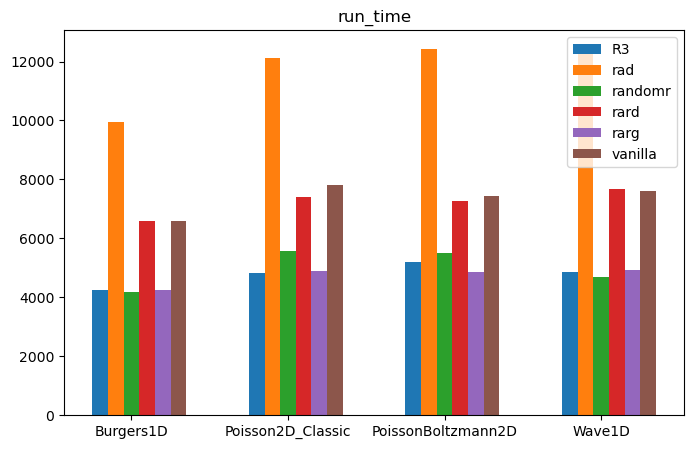

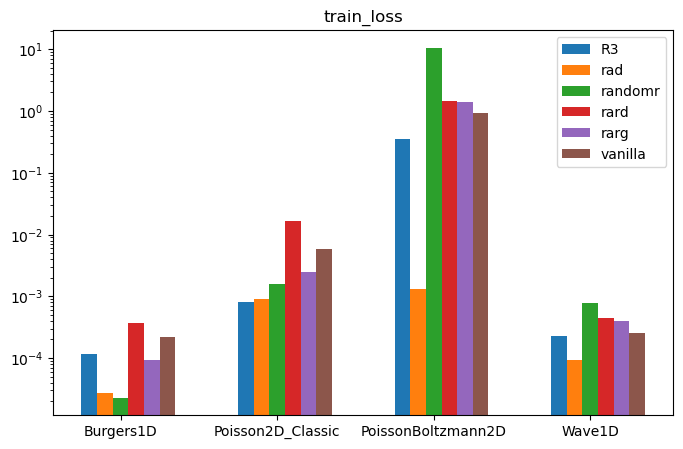

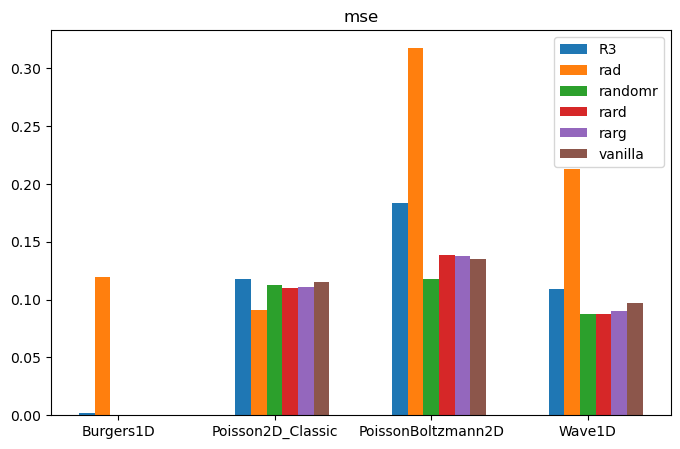

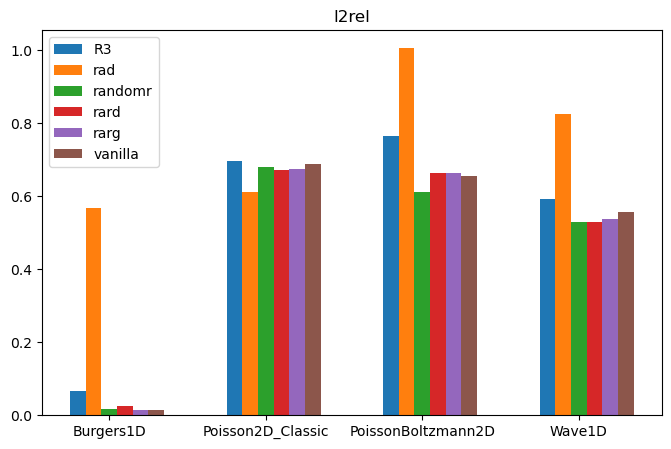

In [37]:
# compare runtime-los-mes-relerr
for k, figname in enumerate(grouped_df.columns):
    plt.figure(figsize=(8,5))
    plt.title(figname)
    x = np.arange(4)
    # for each method choose every pde
    for i, method in enumerate(all_methods):
        res = grouped_df.iloc[i::6, k].values
        plt.bar(x+0.1*(i-2), res, width=0.1, label=method)
        if figname == 'train_loss':
            plt.yscale('log')
    plt.xticks(x, all_pdes)
    plt.legend()

In [40]:
grouped_df.iloc[5::6, -1:]

,,l2rel
pde,method,
Burgers1D,vanilla,0.013549
Poisson2D_Classic,vanilla,0.686223
PoissonBoltzmann2D,vanilla,0.654667
Wave1D,vanilla,0.556650


In [41]:
grouped_df.iloc[4::6, -1:]

,,l2rel
pde,method,
Burgers1D,rarg,0.013522
Poisson2D_Classic,rarg,0.675003
PoissonBoltzmann2D,rarg,0.661856
Wave1D,rarg,0.536862
